### Numerical solutions for steady spherically symmetric accretion

$$\frac{\mathcal{M}^2-1}{2\mathcal{M}^2}\frac{d\mathcal{M}^2}{d\xi}=[1+(\frac{\gamma-1}{2})\mathcal{M}^2]\cdot[\frac{2E}{\xi}-(\frac{5-3\gamma}{\gamma-1})\frac{GM}{2r_0\xi^2}]/[E+\frac{GM}{r_0\xi}]=F(\mathcal{M}^2,\xi)$$

If $E=(\frac{5-3\gamma}{\gamma-1})\frac{GM}{4r_0}$:
$$\frac{\mathcal{M}^2-1}{2\mathcal{M}^2}\frac{d\mathcal{M}^2}{d\xi}=[1+(\frac{\gamma-1}{2})\mathcal{M}^2]\cdot (\frac{5-3\gamma}{\gamma-1})\cdot\frac{1-\frac{1}{\xi}}{\frac{1}{2}(\frac{5-3\gamma}{\gamma-1})\xi+2}$$

##### Asymptotic analysis
near the vicinity of critical point (1,1), the (hyperbolas) asymptotic relation between $\mathcal{M}^2$ and $\xi$ is : 
$$\mathcal{M}^2=v(\xi-1)+1$$
which makes sure that $\mathcal{M}^2\to 1$ when $\xi\to 1$</br> 
$v$ is determined by $$v^2-4(\gamma-1)v-2(5\gamma-3)=0$$

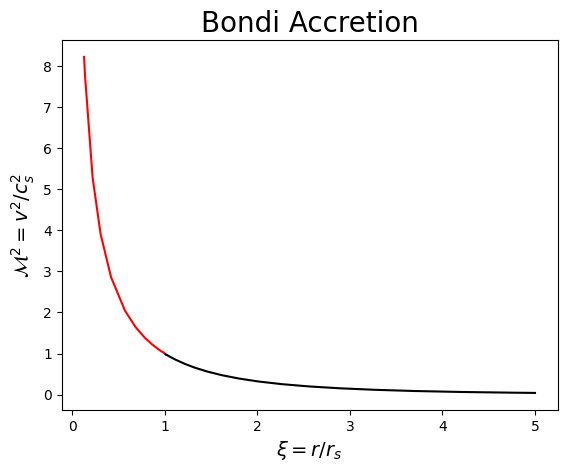

In [113]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import symbols, solve
import numpy as np

v = symbols('v')
gamma = 4/3

#Asymptotic relation
eq = v**2 - 4*(gamma - 1)*v - 2*(5*gamma - 3)
v_solutions = solve(eq, v)

vb = float([sol for sol in v_solutions if sol < 0][0])  #Bondi
vp = float([sol for sol in v_solutions if sol > 0][0])  #Parker

#For the case of Bondi Accretion
def yb(x):
    return vb * (x - 1) + 1
xb = np.linspace(0.99, 1.01, 400)
y = yb(xb)

#Get the initical values yl, yr near critical point xl=0.99, xr=1.01
xl=0.99
xr=1.01
yl = yb(xl)
yr = yb(xr)

#If E = (5-3gamma)/(gamma-1)*G*M/4*r0, x: xi; y: mach number squared; gamma = 4/3
def bondi_eq(x, y):
    f = (1+((gamma-1)/2)*y)*((5-3*gamma)/(gamma-1))*(1-(1/x))/(0.5*((5-3*gamma)/(gamma-1))*x+2)
    g = (y-1)/(2*y)
    return f / g

#Integrate from the vicinity of the critical point to large radii
def integrate_to_large(y_s1):
    solv1 = solve_ivp(bondi_eq, [xr, 5], [y_s1], method='RK45', dense_output=True , rtol=1e-6)
    return solv1

#Integrate from the vicinity of the critical point to small radii
def integrate_to_small(y_s2):
    solv2 = solve_ivp(bondi_eq, [xl, 0.13], [y_s2], method='RK45', dense_output=True , rtol=1e-6)
    return solv2

plt.plot(xb, y)#Near the vinity 
plt.plot(integrate_to_small(yl).t, integrate_to_small(yl).y[0], color = 'r')#integrate to small radii
plt.plot(integrate_to_large(yr).t, integrate_to_large(yr).y[0], color = 'black')#integrate to large radii
plt.xlabel(r'$\xi=r/r_s$', fontsize=7*2)
plt.ylabel(r'$\mathcal{M}^2 = v^2 / c_s^2$', fontsize=7*2)
plt.title('Bondi Accretion', fontsize=10*2)
# plt.plot(1, 1, 'ro')
plt.show()


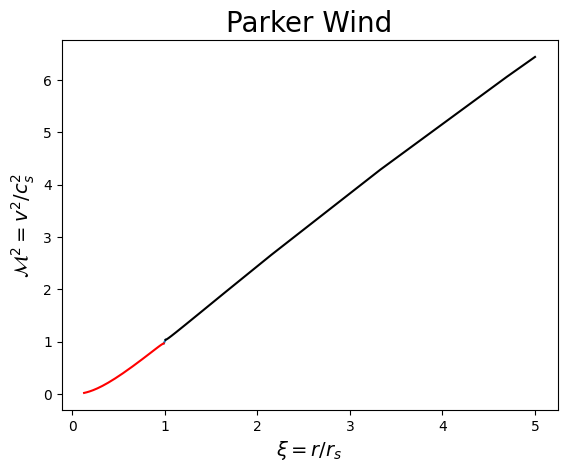

In [116]:
#For Parker Wind
def yb(x):
    return vp * (x - 1) + 1

xb = np.linspace(0.99, 1.01, 400)
y = yb(xb)
xl=0.99
xr=1.01
yl = yb(xl)
yr = yb(xr)

plt.plot(xb, y)#Near the vinity 
plt.plot(integrate_to_small(yl).t, integrate_to_small(yl).y[0], color = 'r')#integrate to small radii
plt.plot(integrate_to_large(yr).t, integrate_to_large(yr).y[0], color = 'black')#integrate to large radii
plt.xlabel(r'$\xi=r/r_s$', fontsize=7*2)
plt.ylabel(r'$\mathcal{M}^2 = v^2 / c_s^2$', fontsize=7*2)
plt.title('Parker Wind', fontsize=10*2)
# plt.plot(1, 1, 'ro')
plt.show()
